# MOVIE GENRE CLASSIFICATION
### Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

### Dataset path

In [2]:
path = 'archive/Genre Classification Dataset/train_data.txt'

### Reading dataset as csv file

In [3]:
Movie_data = pd.read_csv(path,sep = ':::',names=['Movie Name','Genre','Description'],engine='python')

### Visualizing the Dataset

In [4]:
Movie_data

,Movie Name,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


### Description of the dataset

In [5]:
Movie_data.describe()

,Movie Name,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


### Graphical representation of overall genre count in the dataset

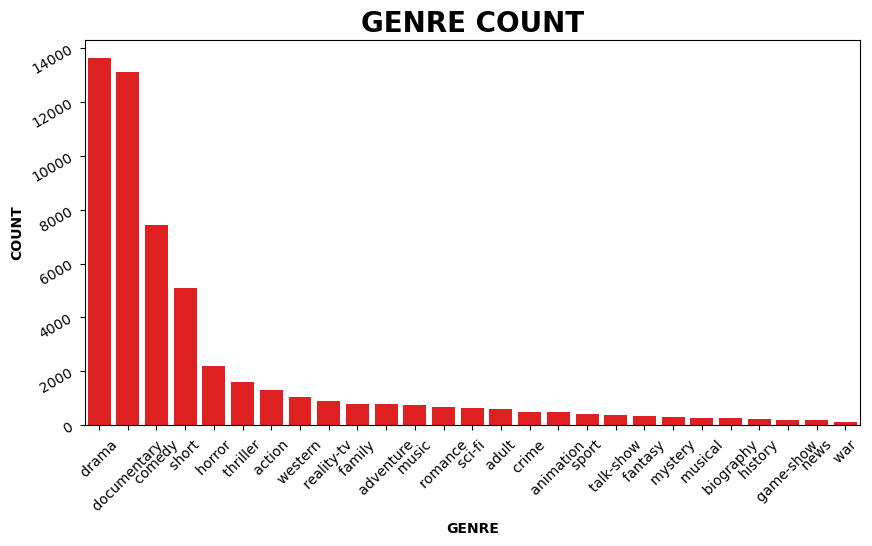

In [6]:
plt.figure(figsize=(10,5))
plt.title("GENRE COUNT",fontweight = 'bold',fontsize = 20)
counts = Movie_data.Genre.value_counts()
sns.barplot(x=counts.index, y=counts,color='r')
plt.xlabel('GENRE',fontweight = 'bold')
plt.ylabel('COUNT',fontweight = 'bold')
plt.xticks(rotation=45);
plt.yticks(rotation =30);

### Checking for null value

In [7]:
Movie_data.isnull().sum()

Movie Name     0
Genre          0
Description    0
dtype: int64

###  Adding one column as length in the dataset

In [8]:
Movie_data['length']=Movie_data['Description'].apply(len)
Movie_data

,Movie Name,Genre,Description,length
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625
...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,507
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,781
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",255
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,642


### Distribuiton of lengths in the dataset

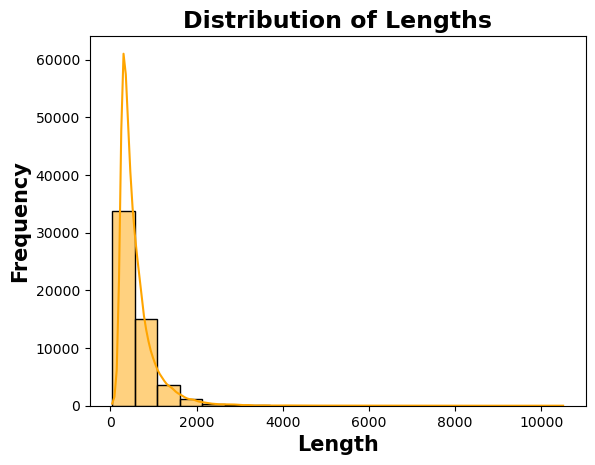

In [9]:
sns.histplot(data=Movie_data, x='length', bins=20, kde=True, color='orange')

plt.xlabel('Length', fontsize=15, fontweight='bold')
plt.ylabel('Frequency', fontsize=15, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=17, fontweight='bold')

plt.show()

### Splitting the dataset into traing and testing sets

In [10]:
x_train, x_test , y_train , y_test = train_test_split(Movie_data['Description'] , Movie_data['Genre'] , 
                                                      test_size=0.3 , shuffle=True , random_state = 42)

print(f'Split data into train and Test sets')
print(f'Train Set\t: {len(x_train)}\nTest Set\t: {len(x_test)}')

Split data into train and Test sets
Train Set	: 37949
Test Set	: 16265


### Term Frequency-Inverse document frequency

In [11]:
vectorize = TfidfVectorizer(stop_words='english', max_features=10000)
print(vectorize)
x_train_tfidf = vectorize.fit_transform(x_train)
print(x_train_tfidf[0])
x_test_tfidf = vectorize.transform(x_test)
print("")
print(x_test_tfidf[0])

TfidfVectorizer(max_features=10000, stop_words='english')
  (0, 9362)	0.2214796965020501
  (0, 1062)	0.17130065619515436
  (0, 3709)	0.1799206603226229
  (0, 3117)	0.1556220015665628
  (0, 8269)	0.19667635265066485
  (0, 7022)	0.2629251190817071
  (0, 7792)	0.20644225637565136
  (0, 1863)	0.1543319452373192
  (0, 6601)	0.12525685992218885
  (0, 3430)	0.47185708995205605
  (0, 9732)	0.2040917244369018
  (0, 8060)	0.2598954525647719
  (0, 5534)	0.25198525005570127
  (0, 9303)	0.17150134636501776
  (0, 5444)	0.26379307149858755
  (0, 8382)	0.1494046512209682
  (0, 6498)	0.17320434834505144
  (0, 240)	0.2024939363959542
  (0, 1441)	0.18955921404419565
  (0, 2395)	0.22687815277149612

  (0, 9903)	0.04195653560631075
  (0, 9892)	0.05305977515481101
  (0, 9873)	0.1037524169760793
  (0, 9489)	0.12109599470035867
  (0, 9487)	0.09159531653403735
  (0, 9388)	0.11780539780342372
  (0, 9315)	0.07527632181235892
  (0, 9303)	0.06357666547243815
  (0, 9225)	0.08489775057768975
  (0, 9172)	0.0851716881

### Implementation by Logistic_Regression 

In [12]:
import warnings
warnings.filterwarnings("ignore")

Logistic_model = LogisticRegression()
Logistic_model.fit(x_train_tfidf, y_train)
L_prediction = Logistic_model.predict(x_test_tfidf)
Logistic_accuracy = accuracy_score(L_prediction,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(Logistic_accuracy*100))

Logistic Regression accuracy is: 57.84%


### Implementation by Navies_bayes_Classifier

In [13]:
NB_model = MultinomialNB()
NB_model.fit(x_train_tfidf, y_train)
pred_naive = NB_model.predict(x_test_tfidf)
naive_accuracy = accuracy_score(pred_naive,y_test)
print('Naive Bayes model accuracy is: {:.2f}%'.format(naive_accuracy*100))

Naive Bayes model accuracy is: 51.04%


### Implementation by Support Vector Machine

In [14]:

from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(x_train_tfidf, y_train)
svm_predict = svm_model.predict(x_test_tfidf)



svm_accuracy = accuracy_score(svm_predict,y_test)
print('SVC model accuracy is: {:.2f}%'.format(svm_accuracy*100))

SVC model accuracy is: 56.24%


### Comparision of Models predictions and Actual value

In [15]:
comparison_data = pd.DataFrame({'Description':x_test,'Logistic_model':L_prediction,'MultinomialNB':pred_naive,
                                'SVM':svm_predict,'Actual genre':y_test})
comparison_data

,Description,Logistic_model,MultinomialNB,SVM,Actual genre
5090,"Catherine St.John-Burke is an independent, up...",drama,drama,comedy,comedy
30324,"Beginning of the century. In a train, a young...",drama,drama,drama,short
6416,"Jerranium 90, a ""little rock"" that made all t...",comedy,drama,sci-fi,comedy
20920,Deadly Tales II is an anthology of three horr...,horror,horror,horror,horror
29550,Grammy - music award of the American academy ...,music,music,music,music
...,...,...,...,...,...
18394,"See Alaska like never before! With ""caught on...",documentary,documentary,documentary,reality-tv
5990,"Carol Foster, a mother of seven adopted child...",drama,drama,drama,documentary
41819,"Beijing Girl: Made in China is a candid, thou...",documentary,documentary,documentary,documentary
43637,The delicate relationship between a 15-year-o...,drama,drama,drama,drama


### Accuracy  of the models

In [16]:
columns=['LogisticRegression', 'MultinomialNB','SVC']
accuracy= [f'{Logistic_accuracy*100:.2f}', f'{naive_accuracy*100:.2f}',f'{svm_accuracy*100:.2f}']

FinalResult=pd.DataFrame({'Algorithm':columns, 'Accuracy':accuracy})

FinalResult

,Algorithm,Accuracy
0,LogisticRegression,57.84
1,MultinomialNB,51.04
2,SVC,56.24


### Graphical representation of Accuracy Comparison by accuracy score

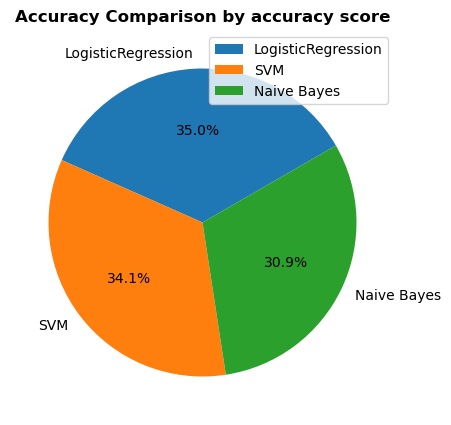

In [17]:
sum = Logistic_accuracy+ svm_accuracy+naive_accuracy
size1 = (Logistic_accuracy/sum)
size2 = (svm_accuracy/sum)
size3 = (naive_accuracy/sum)
labels = ['LogisticRegression','SVM','Naive Bayes']
sizes = [size1, size2,size3]


plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=30)
plt.title('Accuracy Comparison by accuracy score',fontweight = 'bold')
plt.legend()
plt.show()

### Count of the True predicted values by each model

In [18]:
count_true_predict_LR = (L_prediction == y_test).sum()
count_true_predict_SVM = (svm_predict == y_test).sum()
count_true_predict_NB = (pred_naive == y_test).sum()


print("Out of 16265 Naive Bayes Classifier predicted correctly:",count_true_predict_NB)
print("Out of 16265 Logistic Regression Classifier predicted correctly:", count_true_predict_LR)
print("Out of 16265 Support Vector Machine Classifier predicted correctly:", count_true_predict_SVM)

Out of 16265 Naive Bayes Classifier predicted correctly: 8302
Out of 16265 Logistic Regression Classifier predicted correctly: 9407
Out of 16265 Support Vector Machine Classifier predicted correctly: 9148


### Graphical representation of Accuracy Comparison by True predicted values

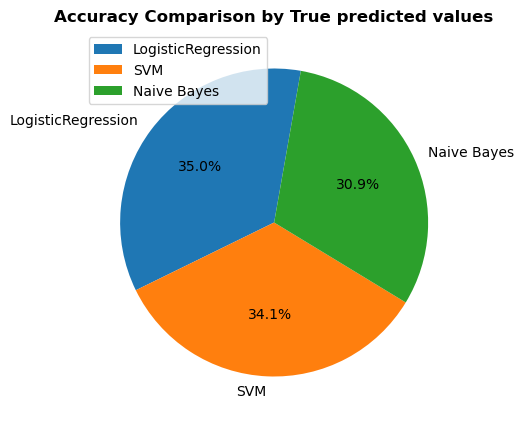

In [19]:
sum = count_true_predict_LR+count_true_predict_NB+count_true_predict_SVM
size1 = (count_true_predict_LR/sum)
size2 = (count_true_predict_SVM/sum)
size3 = (count_true_predict_NB/sum)
labels = ['LogisticRegression','SVM','Naive Bayes']
sizes = [size1, size2,size3]


plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=80)
plt.title('Accuracy Comparison by True predicted values',fontweight = 'bold')
plt.legend()
plt.show()